   DrivAge  ClaimNb     Exposure
0       18       65   210.689377
1       19      243   912.874303
2       20      335  1460.979158
3       21      353  1819.911138
4       22      430  2223.703357
   DrivAge  ClaimNb     Exposure  Frequency
0       18       65   210.689377   0.308511
1       19      243   912.874303   0.266192
2       20      335  1460.979158   0.229298
3       21      353  1819.911138   0.193966
4       22      430  2223.703357   0.193371
              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528545       6.454631   
std    1.641783e+06       0.240117       0.364081       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.0000

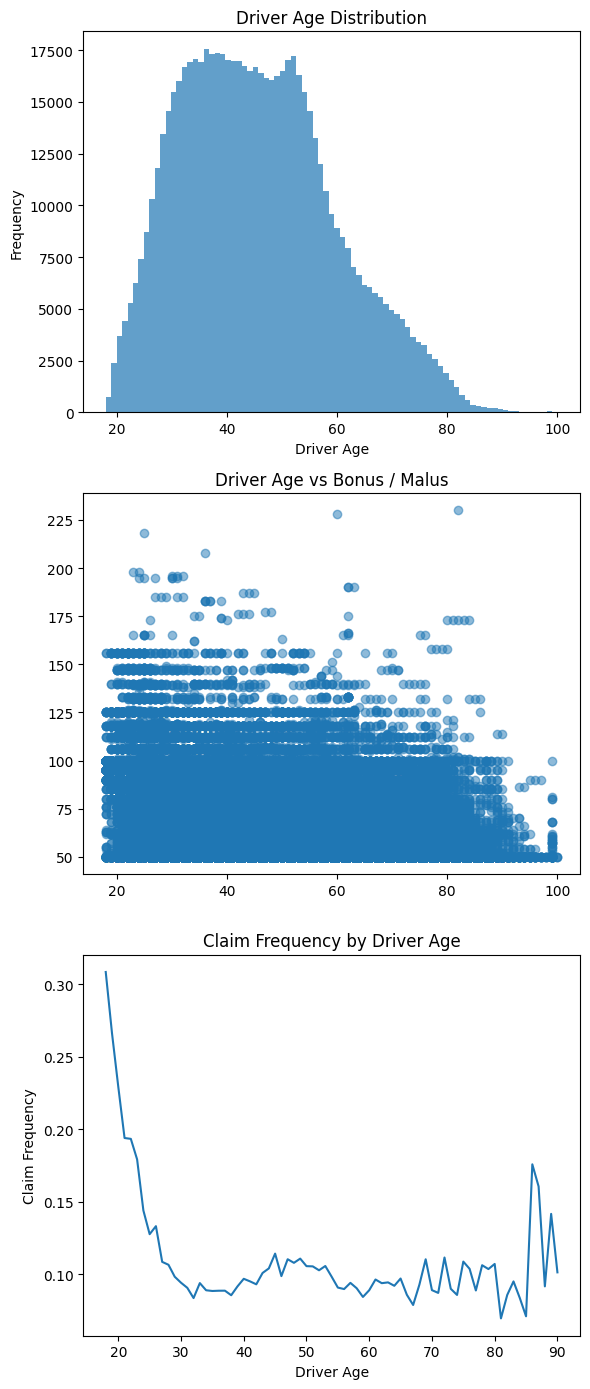

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mtlp_data = pd.read_csv("freMTPL2freq.csv")
mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)

mtlp_age_count = mtlp_data["DrivAge"].nunique()

age_stats = mtlp_data.groupby("DrivAge").agg({
    "ClaimNb": "sum",
    "Exposure": "sum"
}).reset_index()

print(age_stats.head())

age_stats["Frequency"] = age_stats["ClaimNb"] / age_stats["Exposure"]

print(age_stats.head())


# Display basic statistics of the dataset
print(mtlp_data.describe())

fig, ax = plt.subplots(3, 1, figsize=(6, 14))

plot_data = age_stats[(age_stats["DrivAge"] >= 18) & (age_stats["DrivAge"] <= 90)]

ax[0].hist(mtlp_data["DrivAge"], bins=mtlp_age_count, alpha=0.7)
ax[0].set_title("Driver Age Distribution")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Frequency")

ax[1].scatter(mtlp_data["DrivAge"], mtlp_data["BonusMalus"], alpha=0.5)
ax[1].set_title("Driver Age vs Bonus / Malus")

sns.lineplot(data=plot_data, x="DrivAge", y="Frequency", ax=ax[2])
ax[2].set_title("Claim Frequency by Driver Age")
ax[2].set_xlabel("Driver Age")
ax[2].set_ylabel("Claim Frequency")



plt.tight_layout()
plt.show()